In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc

In [2]:
df = pd.read_csv('C:/Users/Vikash/Desktop/heru/Creditcard_repo-master/Creditcard_repo-master/creditcard.csv')
df

,Time,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,Amount,class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,497,-0.417836,0.981103,1.135820,-0.172593,0.396675,-0.002842,0.519780,0.248763,-0.593497,...,-0.205580,-0.547474,-0.020486,-0.368187,-0.227053,0.105281,0.253800,0.081276,8.83,0
659,498,-0.753769,1.098287,1.835453,0.614571,-0.317859,-0.101055,0.039454,-0.656824,-0.048761,...,1.101142,0.686059,0.005954,0.361744,-0.457852,-0.352576,0.094602,0.170480,5.00,0
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
661,499,1.355790,-1.122921,1.191187,-0.576548,-1.708750,0.274721,-1.640785,0.295838,0.618649,...,0.302035,0.920013,-0.210219,-0.435499,0.450803,0.068454,0.062214,0.022191,22.83,0


In [3]:
df.isna()

,Time,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,Amount,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
659,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
660,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['normalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'], axis = 1)

In [5]:
df = df.drop(['Time'], axis = 1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.384311
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.327932
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.494582
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.257694
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.001695


In [17]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', 'class', 'normalizedAmount'],
      dtype='object')

In [26]:
X = df[['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28']]
y = df['class']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

In [28]:
X_train.shape


(464, 27)

In [29]:
X_test.shape

(199, 27)

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)

In [32]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred = random_forest.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(y_test, y_pred)

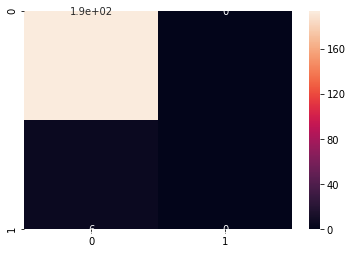

In [36]:
sns.heatmap(cm, annot = True)

In [37]:
print(cm)

[[193   0]
 [  6   0]]


In [56]:
from sklearn.metrics import classification_report

In [57]:
classification_report(y_test, y_pred)

C:\Users\Vikash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       193\n           1       0.00      0.00      0.00         6\n\n    accuracy                           0.97       199\n   macro avg       0.48      0.50      0.49       199\nweighted avg       0.94      0.97      0.96       199\n'

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       193
           1       0.00      0.00      0.00         6

    accuracy                           0.97       199
   macro avg       0.48      0.50      0.49       199
weighted avg       0.94      0.97      0.96       199



In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.5


Text(0.5, 0, 'False Positive Rate')

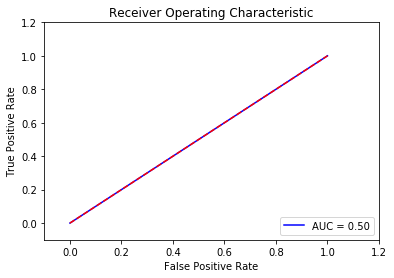

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')